In [1]:
!cd

C:\Users\Renee Kaul\quantium\data preparation\intermediate\code


### Loading the libraries and datasets that will be used in the analysis

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
transdata = pd.read_csv("C:/Users/Renee Kaul/quantium/data preparation/raw/transaction_data.csv")

### Exploratory Analysis- The first step is to know your data

In [4]:
transdata.head(10)
# We use this to have a look at the first 10 rows of the data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [5]:
transdata.drop_duplicates()
transdata

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [6]:
transdata.info() ##Provides the concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
##As we can see that in thee date column, the dates were excel integers, we can convert the same into date with datetime module
import datetime as dt
transdata['REAL_DATE'] = pd.TimedeltaIndex(transdata['DATE'], unit='d') + dt.datetime(1900,1,1) 
transdata

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-19
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-20
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-11
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-15
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-08
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-29


In [8]:
transdata['REAL_DATE'] = transdata['REAL_DATE'] + dt.timedelta(-2)
transdata

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27


In [9]:
transdata.PROD_NAME.describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

#### We are interested in only the products that are Chips

In [10]:
##Creating a unique list of all the Product names within the data
unique = list(transdata.PROD_NAME.unique())
unique

['Natural Chip        Compny SeaSalt175g',
 'CCs Nacho Cheese    175g',
 'Smiths Crinkle Cut  Chips Chicken 170g',
 'Smiths Chip Thinly  S/Cream&Onion 175g',
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
 'Old El Paso Salsa   Dip Tomato Mild 300g',
 'Smiths Crinkle Chips Salt & Vinegar 330g',
 'Grain Waves         Sweet Chilli 210g',
 'Doritos Corn Chip Mexican Jalapeno 150g',
 'Grain Waves Sour    Cream&Chives 210G',
 'Kettle Sensations   Siracha Lime 150g',
 'Twisties Cheese     270g',
 'WW Crinkle Cut      Chicken 175g',
 'Thins Chips Light&  Tangy 175g',
 'CCs Original 175g',
 'Burger Rings 220g',
 'NCC Sour Cream &    Garden Chives 175g',
 'Doritos Corn Chip Southern Chicken 150g',
 'Cheezels Cheese Box 125g',
 'Smiths Crinkle      Original 330g',
 'Infzns Crn Crnchers Tangy Gcamole 110g',
 'Kettle Sea Salt     And Vinegar 175g',
 'Smiths Chip Thinly  Cut Original 175g',
 'Kettle Original 175g',
 'Red Rock Deli Thai  Chilli&Lime 150g',
 'Pringles Sthrn FriedChicken 134g',
 'Pringle

In [11]:
## finding the different variations (maybe due to typing erorrs) that exist of the word 'Chip'
## because we only care about the product 'Chips'.
## We do this because we need to create a unique list that only has chips product in it.
chips_var = list()
for x in unique:
    temp = x.strip().split()
    for ele in temp:
        if ele.startswith('ch') or ele.startswith('Ch'):
            chips_var = chips_var + [ele]
                
chips_var

['Chip',
 'Cheese',
 'Chips',
 'Chicken',
 'Chip',
 'ChpsHny&Jlpno',
 'Chili',
 'Chips',
 'Chilli',
 'Chip',
 'Cheese',
 'Chicken',
 'Chips',
 'Chives',
 'Chip',
 'Chicken',
 'Cheezels',
 'Cheese',
 'Chip',
 'Chilli&Lime',
 'Chips',
 'Chli&S/Cream175G',
 'Chilli',
 'ChipCo',
 'Chckn175g',
 'Chp',
 'Chicken270g',
 'Chicken',
 'Cheese',
 'Chicken',
 'Chips',
 'Chilli',
 'Chilli',
 'Chips',
 'Cheese',
 'Chnky',
 'Chips',
 'Chip',
 'Chips',
 'Chips',
 'Chips',
 'Chs&Onion170g',
 'Chips',
 'Chips',
 'Cheese',
 'Chilli&',
 'Chips',
 'Chips',
 'Chips',
 'Chip',
 'Chips',
 'Cheese',
 'Chip',
 'Chicken',
 'Chips',
 'Chip',
 'Cheezels',
 'Cheese',
 'Chips',
 'Chips',
 'Cheetos',
 'Chilli',
 'ChpsBtroot&Ricotta',
 'Cheese',
 'Cheese',
 'Chipotle',
 'Cheese',
 'Chips',
 'Ched',
 'Chives',
 'Cheddr&Mstrd',
 'Cheetos',
 'Chs',
 'ChpsFeta&Garlic',
 'Chutny',
 'Chimuchurri',
 'Chicken',
 'Cheese',
 'Chips',
 'ChipCo',
 'Chikn&Garlic']

In [12]:
## Finding index of the unique elements in the list of products which match a criteria
## In this case, the criteria is that the word 'chip' and its variations occurs in the list.
def Unique_index(unique):
    count = -1
    chips= list()
    for x in unique:
        count +=1
        temp = x.strip().split()
        for ele in temp:
            #Inculcating all the variations of the word 'Chip' according to the list chips_var
            if ele.startswith('chp') or ele.startswith('chps') or ele.startswith('Chps')\
            or ele.startswith('Chip') or ele.startswith('chip') or ele.startswith('chips')\
            or ele.startswith('Chips') or ele.startswith('Chp'):
                chips = chips + [count]
    return chips

Chips = Unique_index(unique)
print(Chips, end = " ")

[0, 2, 3, 4, 6, 8, 13, 17, 22, 28, 34, 35, 44, 53, 56, 58, 59, 60, 61, 62, 64, 67, 68, 69, 70, 71, 73, 75, 76, 79, 80, 86, 89, 91, 98, 106, 108] 

In [13]:
## We create a unique list of the product chips
## The list has 37 elements 
chips_uni = list()
for ind in transdata.index:
    for elem in Chips:
        if ind == elem:
            chips_uni += [unique[ind]]
chips_uni

['Natural Chip        Compny SeaSalt175g',
 'Smiths Crinkle Cut  Chips Chicken 170g',
 'Smiths Chip Thinly  S/Cream&Onion 175g',
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
 'Smiths Crinkle Chips Salt & Vinegar 330g',
 'Doritos Corn Chip Mexican Jalapeno 150g',
 'Thins Chips Light&  Tangy 175g',
 'Doritos Corn Chip Southern Chicken 150g',
 'Smiths Chip Thinly  Cut Original 175g',
 'Thins Chips         Originl saltd 175g',
 'Natural ChipCo      Hony Soy Chckn175g',
 'Dorito Corn Chp     Supreme 380g',
 'Thins Chips Seasonedchicken 175g',
 'Doritos Corn Chips  Original 170g',
 'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
 'Natural Chip Co     Tmato Hrb&Spce 175g',
 'Smiths Crinkle Cut  Chips Original 170g',
 'Cobs Popd Sea Salt  Chips 110g',
 'Smiths Crinkle Cut  Chips Chs&Onion170g',
 'French Fries Potato Chips 175g',
 'Doritos Corn Chips  Cheese Supreme 170g',
 'WW Original Corn    Chips 200g',
 'Thins Potato Chips  Hot & Spicy 175g',
 'Cobs Popd Sour Crm  &Chives Chips 110g',
 'Smiths

In [14]:
## Creating new dataset that contains only values of PROD_NAME variable that are in chips_uni list    
new_transdata = pd.DataFrame(transdata[transdata.PROD_NAME.isin(chips_uni) == True])

## Dropping the column of DATE in the new transdata as we do not require it
new_trans = new_transdata.drop(['DATE'], axis = 1)
new_trans

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18
6,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,2019-05-16
...,...,...,...,...,...,...,...,...
264816,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2019-05-29
264824,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,2019-03-13
264826,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2019-03-25
264830,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,2018-11-12


In [15]:
  new_trans.PROD_NAME.describe()

count                                        87335
unique                                          37
top       Kettle Tortilla ChpsHny&Jlpno Chili 150g
freq                                          3296
Name: PROD_NAME, dtype: object

In [16]:
#Checking the presence of null values
bool_series = pd.notnull(new_trans)
bool_series

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE
0,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
264816,True,True,True,True,True,True,True,True
264824,True,True,True,True,True,True,True,True
264826,True,True,True,True,True,True,True,True
264830,True,True,True,True,True,True,True,True


In [17]:
#We sort the data using the column PROD_QTY in descending order to find any outliers
new_trans.sort_values(by=['PROD_QTY'], ascending=False)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE
69762,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.00,2018-08-19
69763,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.00,2019-05-20
17077,153,153161,152587,30,Doritos Corn Chips Cheese Supreme 170g,5,22.00,2018-08-20
228570,79,79169,77499,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,5,23.00,2019-05-18
99458,138,138085,141016,40,Thins Chips Seasonedchicken 175g,5,16.50,2018-08-17
...,...,...,...,...,...,...,...,...
82501,20,20443,17453,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.00,2019-05-12
204161,94,94162,93482,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,1,4.60,2018-08-15
204155,94,94132,93289,106,Natural ChipCo Hony Soy Chckn175g,1,3.00,2019-05-15
22963,195,195352,195255,110,WW Original Corn Chips 200g,1,1.90,2019-05-29


In [18]:
#Looks like we found that one customer has made same 2 transcations on different date. We try and filter out the customer's
#transactions and find that this cutomer isn't regular and has made only these two transactions on different dates.
#He must have brought them for commercial uses 

new_trans.loc[new_trans['LYLTY_CARD_NBR'] == 226000]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE
69762,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-19
69763,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-20


In [19]:
#We remove the two transactions of the same customer
new_trans= new_trans.drop([69762,69763])
new_trans.sort_values(by=['PROD_QTY'], ascending=False)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE
150342,10,10175,10075,44,Thins Chips Light& Tangy 175g,5,16.50,2019-05-18
228711,205,205149,204215,1,Smiths Crinkle Cut Chips Barbecue 170g,5,14.50,2018-08-17
5179,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.50,2018-08-15
117935,226,226193,227260,40,Thins Chips Seasonedchicken 175g,5,16.50,2019-05-14
117917,221,221184,220787,16,Smiths Crinkle Chips Salt & Vinegar 330g,5,28.50,2018-08-18
...,...,...,...,...,...,...,...,...
82501,20,20443,17453,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.00,2019-05-12
204161,94,94162,93482,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,1,4.60,2018-08-15
204155,94,94132,93289,106,Natural ChipCo Hony Soy Chckn175g,1,3.00,2019-05-15
22963,195,195352,195255,110,WW Original Corn Chips 200g,1,1.90,2019-05-29


In [20]:
#Grouping the column by the REAL_DATE column to check if everything's normal and creating a series
#The index of the series would be the dates and the values will be the count of the dates.
dates = new_trans.groupby('REAL_DATE').size()
dates

REAL_DATE
2018-07-01    198
2018-07-02    224
2018-07-03    238
2018-07-04    225
2018-07-05    243
             ... 
2019-06-26    223
2019-06-27    212
2019-06-28    272
2019-06-29    247
2019-06-30    252
Length: 364, dtype: int64

In [21]:
#Generating DatetimeIndex with all the dates from 2018-07-03
idx = pd.date_range('2018-07-01', periods=365, freq='D')
idx

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [22]:
#Reindexing the table with the dates and filling the value 0 to the date that was missing.
dates = dates.reindex(idx, fill_value = 0)
dates

2018-07-01    198
2018-07-02    224
2018-07-03    238
2018-07-04    225
2018-07-05    243
             ... 
2019-06-26    223
2019-06-27    212
2019-06-28    272
2019-06-29    247
2019-06-30    252
Freq: D, Length: 365, dtype: int64

Text(0.5, 1.0, 'Transactions over time')

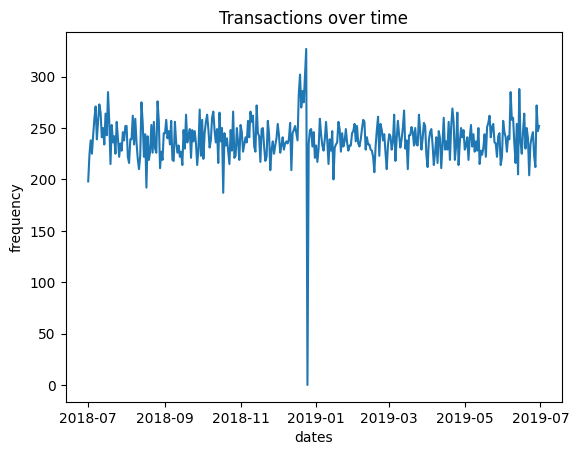

In [23]:
#Plotting the transactions over time
import matplotlib.pyplot as plt
plt.plot(dates)
plt.xlabel('dates')
plt.ylabel('frequency')
plt.title('Transactions over time')


(array([17866., 17870., 17874., 17878., 17882., 17886., 17890., 17894.,
        17897.]),
 [Text(17866.0, 0, '2018-12-01'),
  Text(17870.0, 0, '2018-12-05'),
  Text(17874.0, 0, '2018-12-09'),
  Text(17878.0, 0, '2018-12-13'),
  Text(17882.0, 0, '2018-12-17'),
  Text(17886.0, 0, '2018-12-21'),
  Text(17890.0, 0, '2018-12-25'),
  Text(17894.0, 0, '2018-12-29'),
  Text(17897.0, 0, '2019-01-01')])

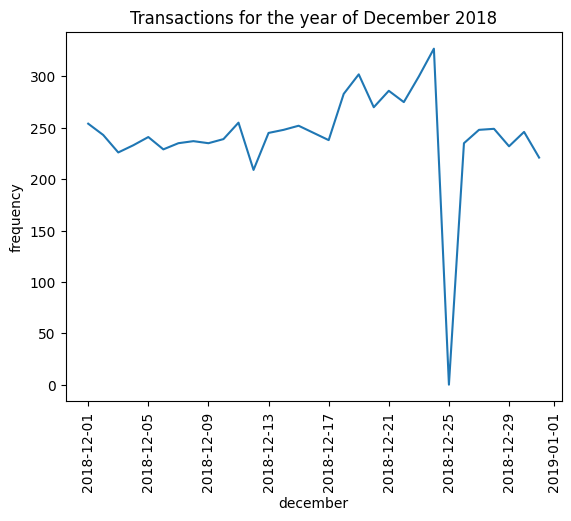

In [24]:
#Zooming in the December of 2018
#There's a rise in the sales seen before christmas for Chips. However, on the Christmas the 
december = dates.loc['2018-12-01':'2018-12-31']
plt.plot(december)
plt.xlabel('december')
plt.ylabel('frequency')
plt.title('Transactions for the year of December 2018')
plt.xticks(rotation = 90)


In [25]:
'''We would now like to know which package size was bought how many times. 
For that we need to seperate the package size and
count it by grouping and plot a histogram.'''
import re
package_size = list()
for prod in new_trans['PROD_NAME']:
    found = re.findall("[0-9]",prod)
    word = ''.join(map(str,found))
    package_size += [word] 
package_size = pd.DataFrame(package_size, columns=['size'])
pack_size = package_size.groupby(['size'])['size'].count()
pack_size

size
110     9693
150    15956
160     2970
170    15413
175    29215
200     4473
330     3197
380     6416
Name: size, dtype: int64

Text(0.5, 1.0, 'Pack sizes and their frequencies')

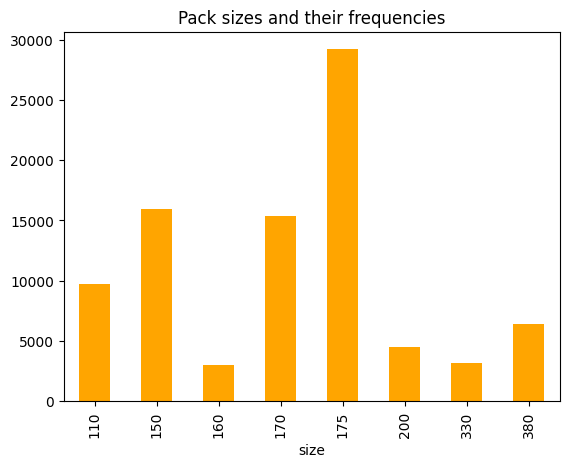

In [26]:
#plotting histogram of the pack sizes
pack_size.plot(kind='bar', color = 'orange')
plt.title('Pack sizes and their frequencies')


In [27]:
#Plotting the top brand in Chips
import re
#print(new_trans['PROD_NAME'].unique())
brands = list()
for prod_name in new_trans['PROD_NAME']:
    temp = prod_name.strip().split()
    brands += [temp[0]]
    
brands = pd.DataFrame(brands, columns = ['brands'])
brands['brands'] = brands['brands'].replace(to_replace = 'Dorito', value = 'Doritos')
brands = brands.groupby(['brands'])['brands'].count()
brands

brands
Cobs         9693
Doritos     19057
French       1418
Kettle       9580
Natural      6050
Smiths      16872
Thins       14075
Tostitos     3145
WW           7443
Name: brands, dtype: int64

Text(0.5, 1.0, 'Brands and their purchase frequency')

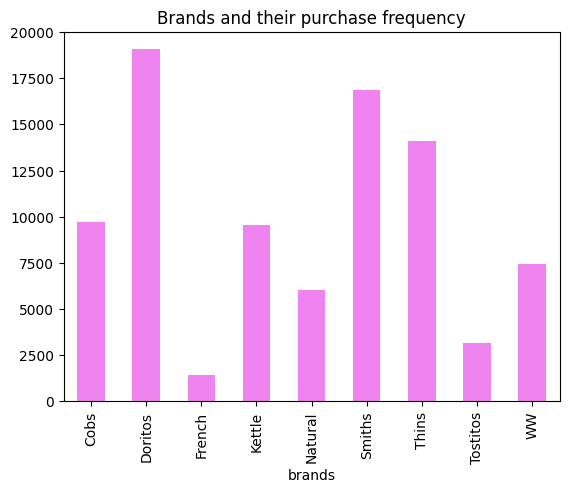

In [28]:
#Plotting a histogram for the brands to visualise the top brand!
brands.plot(kind='bar', color= 'violet')
plt.title('Brands and their purchase frequency')


## Importing Customer data

In [29]:
custdata = pd.read_csv("C:/Users/Renee Kaul/quantium/data preparation/raw/customer_data.csv")
custdata

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


### Exploratory data analysis

In [30]:
#Dropping duplicates if they exist
custdata.drop_duplicates()
custdata

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [31]:
#merging the two datasets
merge = pd.merge(new_trans,custdata, on = 'LYLTY_CARD_NBR', how = 'left')
merge

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,YOUNG SINGLES/COUPLES,Premium
1,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,MIDAGE SINGLES/COUPLES,Budget
2,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,MIDAGE SINGLES/COUPLES,Budget
3,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,MIDAGE SINGLES/COUPLES,Budget
4,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,2019-05-16,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
87328,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2019-05-29,YOUNG SINGLES/COUPLES,Premium
87329,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,2019-03-13,YOUNG SINGLES/COUPLES,Premium
87330,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2019-03-25,YOUNG SINGLES/COUPLES,Premium
87331,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,2018-11-12,YOUNG SINGLES/COUPLES,Premium


In [32]:
#checking for nulls
merge.info()
#Since there are no nulls found, this means all the data was merged succesfully

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87333 entries, 0 to 87332
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   STORE_NBR         87333 non-null  int64         
 1   LYLTY_CARD_NBR    87333 non-null  int64         
 2   TXN_ID            87333 non-null  int64         
 3   PROD_NBR          87333 non-null  int64         
 4   PROD_NAME         87333 non-null  object        
 5   PROD_QTY          87333 non-null  int64         
 6   TOT_SALES         87333 non-null  float64       
 7   REAL_DATE         87333 non-null  datetime64[ns]
 8   LIFESTAGE         87333 non-null  object        
 9   PREMIUM_CUSTOMER  87333 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 7.3+ MB


# Data Analysis of the merged data
### Some metrics that we define and are interested in knowing about the data are:
#### - Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
#### - How many customers are in each segment
#### - How many chips are bought per customer by segment
#### - What's the average chip price by customer segment

In [33]:
merge['AVG_SALES'] = merge['TOT_SALES']/merge['PROD_QTY']
merge

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE,LIFESTAGE,PREMIUM_CUSTOMER,AVG_SALES
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,YOUNG SINGLES/COUPLES,Premium,3.00
1,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,MIDAGE SINGLES/COUPLES,Budget,1.45
2,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,MIDAGE SINGLES/COUPLES,Budget,3.00
3,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,MIDAGE SINGLES/COUPLES,Budget,4.60
4,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,2019-05-16,MIDAGE SINGLES/COUPLES,Budget,5.70
...,...,...,...,...,...,...,...,...,...,...,...
87328,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2019-05-29,YOUNG SINGLES/COUPLES,Premium,3.80
87329,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,2019-03-13,YOUNG SINGLES/COUPLES,Premium,4.60
87330,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2019-03-25,YOUNG SINGLES/COUPLES,Premium,3.80
87331,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,2018-11-12,YOUNG SINGLES/COUPLES,Premium,3.30


Text(0.5, 1.0, 'Customer segmentation by their PREMIUM status')

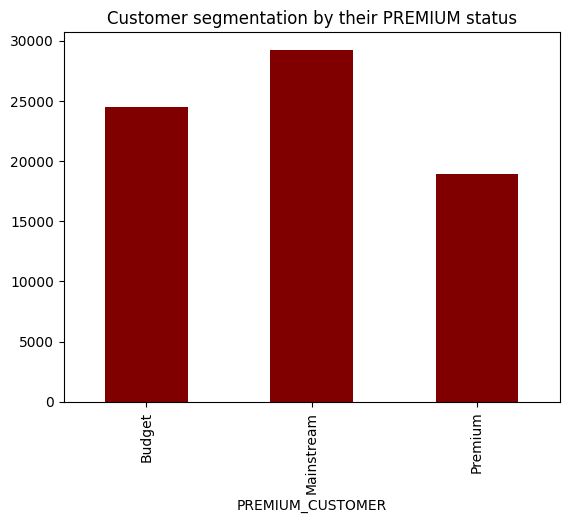

In [34]:
#No. of customers divided as per their premium status.
cust_type = custdata.groupby('PREMIUM_CUSTOMER')['PREMIUM_CUSTOMER'].count()
cust_type.plot(kind ='bar', color = 'maroon')
plt.title('Customer segmentation by their PREMIUM status')


Text(0.5, 1.0, 'Customer Segmentation by their LIFESTAGE')

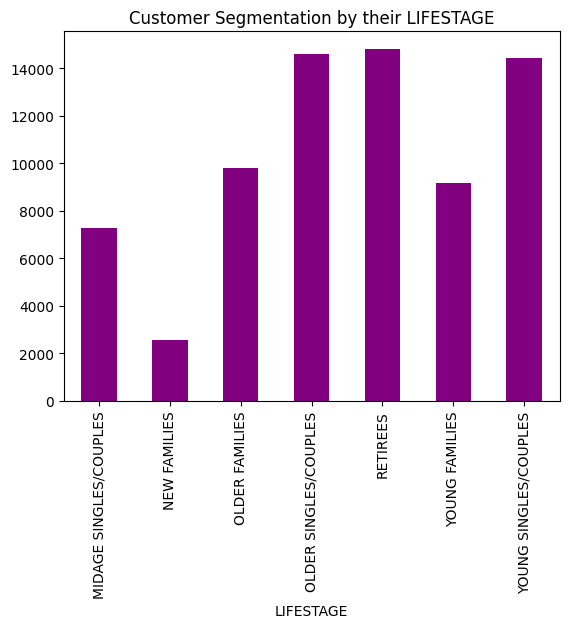

In [35]:
'''No. of customers divided as per their lifestage.'''
import numpy as np
lifestage = custdata.groupby(['LIFESTAGE'])['LIFESTAGE'].count()
lifestage.plot(kind = 'bar', color='purple')
#changing the dimensions of the figure
plt.title('Customer Segmentation by their LIFESTAGE')


In [36]:
#Creating dataframe for sales on the basis of the lifstage.
import numpy as np
ls_sales_df = merge.groupby(['LIFESTAGE'])['TOT_SALES'].sum().reset_index()
ls_sales_df['Percentage'] = np.round((ls_sales_df['TOT_SALES']/ls_sales_df['TOT_SALES'].sum())*100, decimals = 2)
ls_sales_df

,LIFESTAGE,TOT_SALES,Percentage
0,MIDAGE SINGLES/COUPLES,61000.20,9.61
1,NEW FAMILIES,16457.55,2.59
2,OLDER FAMILIES,115369.60,18.17
3,OLDER SINGLES/COUPLES,132464.35,20.86
4,RETIREES,119553.70,18.83
5,YOUNG FAMILIES,104437.90,16.45
6,YOUNG SINGLES/COUPLES,85776.20,13.51


(0.0, 100.0)

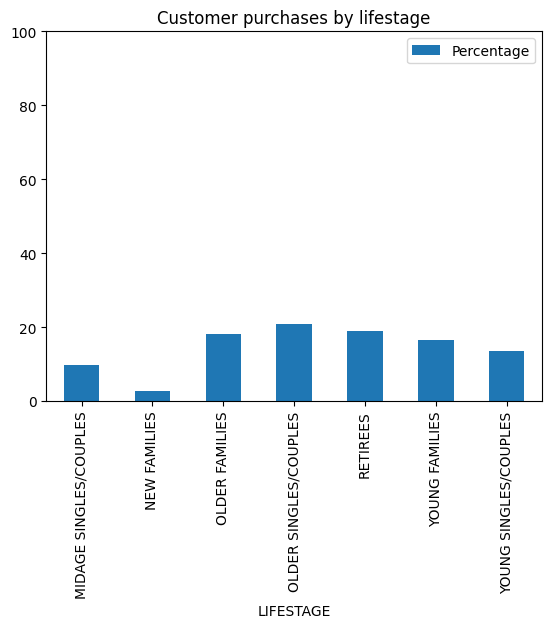

In [37]:
#Plotting bar chart for customer and their sales.
ls_sales_df.plot.bar(x='LIFESTAGE', y='Percentage')
plt.title('Customer purchases by lifestage')
ax = plt.gca()
ax.set_ylim([0, 100])


In [38]:
#Creating dataframe for sales on the basis of the premium status.
pc_sales_df = merge.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
pc_sales_df['Percentage'] = np.round((pc_sales_df['TOT_SALES']/pc_sales_df['TOT_SALES'].sum())*100, decimals = 2)
pc_sales_df
pc_sales_df

,PREMIUM_CUSTOMER,TOT_SALES,Percentage
0,Budget,222228.55,34.99
1,Mainstream,247492.50,38.97
2,Premium,165338.45,26.04


(0.0, 100.0)

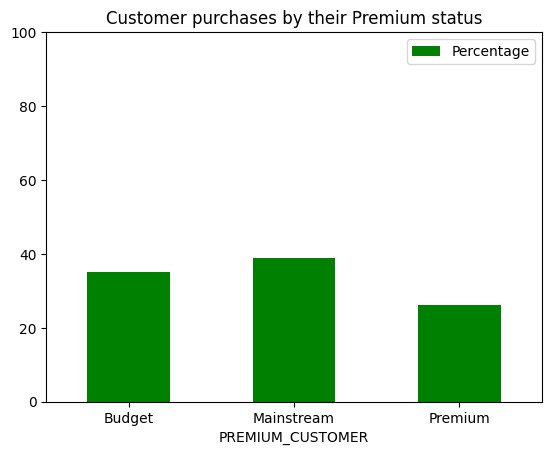

In [39]:
#Plotting bar chart for customer and their sales.
pc_sales_df.plot.bar(x='PREMIUM_CUSTOMER', y='Percentage',color='green')
#rotating the x-axis labels to make them more visible and avoid overlapping
plt.xticks(rotation=0)
plt.title('Customer purchases by their Premium status')
bx = plt.gca()
bx.set_ylim([0,100])


In [40]:
cust_segment = merge.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
cust_segment['PERCENTAGE'] = np.round((cust_segment['TOT_SALES']/cust_segment['TOT_SALES'].sum())*100,decimals = 2)
cust_segment

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PERCENTAGE
0,MIDAGE SINGLES/COUPLES,Budget,12090.80,1.90
1,MIDAGE SINGLES/COUPLES,Mainstream,29978.75,4.72
2,MIDAGE SINGLES/COUPLES,Premium,18930.65,2.98
3,NEW FAMILIES,Budget,7097.05,1.12
4,NEW FAMILIES,Mainstream,5640.40,0.89
5,NEW FAMILIES,Premium,3720.10,0.59
6,OLDER FAMILIES,Budget,54808.85,8.63
7,OLDER FAMILIES,Mainstream,34709.75,5.47
8,OLDER FAMILIES,Premium,25851.00,4.07
9,OLDER SINGLES/COUPLES,Budget,44910.30,7.07


<AxesSubplot: title={'center': '% of Sales on the basis of Lifestage and Premium Status'}, xlabel='LIFESTAGE', ylabel='PERCENTAGE'>

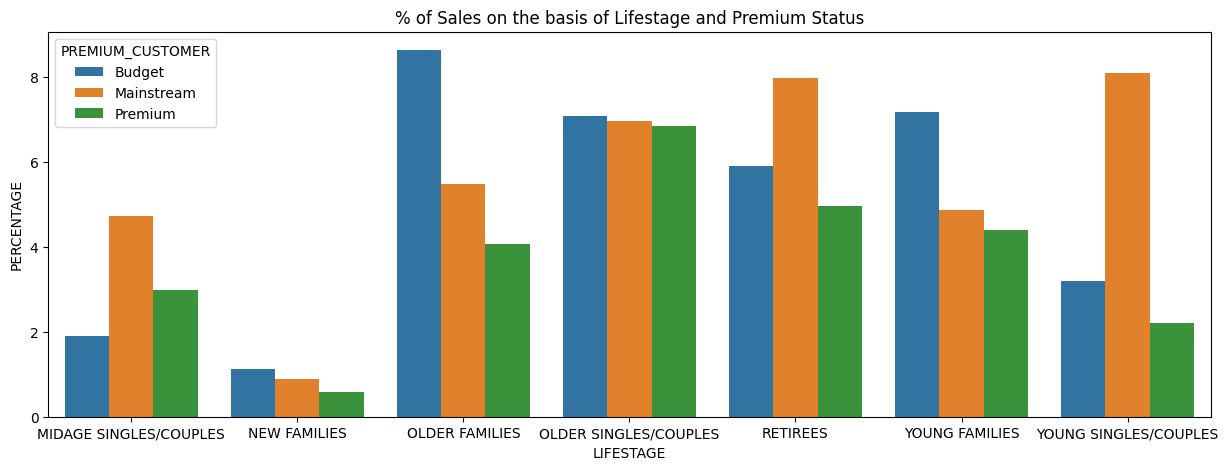

In [201]:
'''creating a grouped bar for the percentage of sales of customers on the basis of premium customer 
and lifestage.'''
plt.figure(figsize=(15,5))
plt.title('% of Sales on the basis of Lifestage and Premium Status')
sns.barplot(data=cust_segment, x = 'LIFESTAGE', y = 'PERCENTAGE', hue = 'PREMIUM_CUSTOMER')

There is higher percentage of sales coming from Mainstream- Young singles/couples and Mainstream- Retirees. This can be explained by the high ratio of customers belonging to these categories. However, this might not the case with the Budget - older families. One reason could be higher quantity of products brought by them. To investigate we find the average quantity per customer and plot it.

In [42]:
'''Finding the average qty brought by lifestage and premium status of customers'''

#grouping the data by lifestage and premium status on the sum of product quantity.
cust_prod_segment = merge.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()
#counting customers
customers = merge.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size()
#creating a new column for average quantity per customer 
cust_prod_segment['CUSTOMERS_COUNT'] = np.array(customers)
cust_prod_segment['AVG_QTY_CUST'] = cust_prod_segment['PROD_QTY']/cust_prod_segment['CUSTOMERS_COUNT']
cust_prod_segment

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,CUSTOMERS_COUNT,AVG_QTY_CUST
0,MIDAGE SINGLES/COUPLES,Budget,3240,1702,1.903643
1,MIDAGE SINGLES/COUPLES,Mainstream,7592,3962,1.916204
2,MIDAGE SINGLES/COUPLES,Premium,5042,2671,1.887683
3,NEW FAMILIES,Budget,1835,991,1.851665
4,NEW FAMILIES,Mainstream,1439,773,1.861578
5,NEW FAMILIES,Premium,962,517,1.860735
6,OLDER FAMILIES,Budget,14673,7544,1.944989
7,OLDER FAMILIES,Mainstream,9286,4755,1.952892
8,OLDER FAMILIES,Premium,7008,3595,1.949374
9,OLDER SINGLES/COUPLES,Budget,11651,6101,1.909687


(1.8, 2.0)

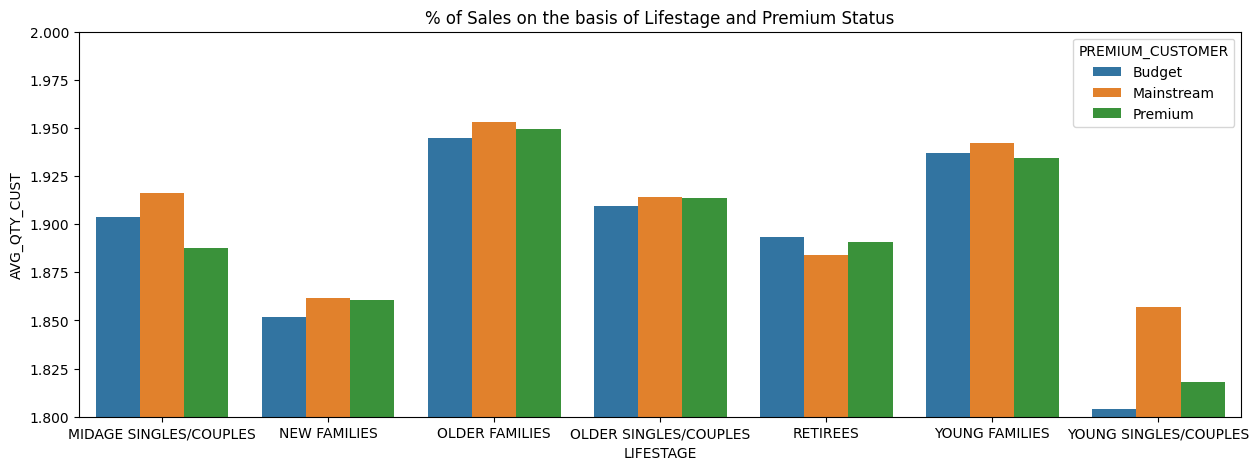

In [203]:
'''creating a grouped bar chart for the average quantity sold per customer on the basis of premium customer 
and lifestage.'''
plt.figure(figsize=(15,5))
plt.title('% of Sales on the basis of Lifestage and Premium Status')
sns.barplot(data=cust_prod_segment, x = 'LIFESTAGE', y = 'AVG_QTY_CUST', hue = 'PREMIUM_CUSTOMER')

'''Zooming in to the y axes to see the difference more clearly as the difference across the customer
segments in terms of average quantity brought per customer is very minute and lie between 0-2.'''
ax = plt.gca()
ax.set_ylim([1.8,2])

We see that Older families and Young families have in general higher average product quantity purchased than the rest. Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

In [44]:
''' adding the column of average sales grouped by lifestage and premium status '''

cust_prod_segment['TOT_SALES'] = cust_segment['TOT_SALES']
cust_prod_segment['AVG_SALES'] = cust_prod_segment['TOT_SALES'] / cust_prod_segment['PROD_QTY']

Text(0.5, 1.0, 'Avg Sales on the basis of Lifestage & Premium Customer')

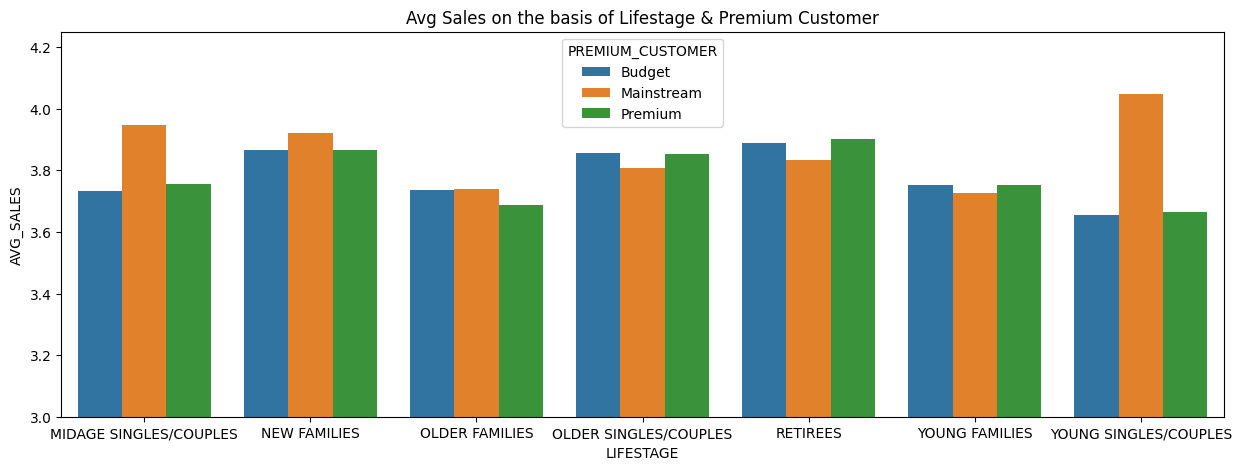

In [204]:
'''creating a grouped bar chart for the average sales of customers on the basis of premium customer 
and lifestage.'''
plt.figure(figsize=(15,5))
plt.title('% of Sales on the basis of Lifestage and Premium Status')
sns.barplot(data=cust_prod_segment, x = 'LIFESTAGE', y = 'AVG_SALES', hue = 'PREMIUM_CUSTOMER')

'''Zooming in to the y axes to see the difference more clearly as the difference across the customer
segments in terms of average sales is very minute and lie between 0-2.'''
bx = plt.gca()
bx.set_ylim([3,4.25])
plt.title('Avg Sales on the basis of Lifestage & Premium Customer')


Mainstream midage and young singles and couples are more willing to pay more per
packet of chips by a good margin as compared to their budget and premium counterparts. This may be due
to there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

Let's do a customer segmentation analysis to find the Top, High value, Medium value, Low value and lost customers using Recency-Frequency-Monetary Analysis.

### Customer Segment Analysis- RFM


In [46]:
merge['DATE'] = merge['REAL_DATE']
merge = merge.drop(['REAL_DATE'],1)
merge.head()

C:\Users\Renee Kaul\AppData\Local\Temp\ipykernel_8920\92696738.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  merge = merge.drop(['REAL_DATE'],1)


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,AVG_SALES,DATE
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,3.00,2018-10-17
1,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,1.45,2019-05-20
2,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,3.00,2018-08-17
3,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,4.60,2018-08-18
4,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,5.70,2019-05-16


In [91]:
#finding the recency, refuency and monetary values for each customers

#Recency

recency = merge.groupby(by='lylty_card_nbr', as_index=False)['date'].max()
recency.columns = ['Lylty_card_nbr', 'LastPurchaseDate']
recent_date = recency['LastPurchaseDate'].max()
recency['Recency'] = recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
recency.head()

,Lylty_card_nbr,LastPurchaseDate,Recency
0,1000,2018-10-17,256
1,1003,2019-03-08,114
2,1004,2018-11-02,240
3,1011,2018-12-19,193
4,1013,2019-03-04,118


In [116]:
#Frequency

frequency= merge.drop_duplicates().groupby(['lylty_card_nbr'], as_index=False)['date'].count()
frequency.columns = ['Lylty_card_nbr', 'Frequency']
frequency

,Lylty_card_nbr,Frequency
0,1000,1
1,1003,1
2,1004,1
3,1011,1
4,1013,1
...,...,...
47774,2330311,1
47775,2370581,2
47776,2370651,1
47777,2370751,1


In [94]:
#Monetary

monetary = merge.groupby(['lylty_card_nbr'], as_index = False)['tot_sales'].sum()
monetary.columns = ['Lylty_card_nbr','Monetary']
monetary

,Lylty_card_nbr,Monetary
0,1000,6.0
1,1003,3.0
2,1004,1.9
3,1011,2.9
4,1013,3.9
...,...,...
47774,2330311,4.4
47775,2370581,17.0
47776,2370651,13.0
47777,2370751,9.2


In [95]:
rf = recency.merge(frequency, on='Lylty_card_nbr')
rfm = rf.merge(monetary, on='Lylty_card_nbr').drop(columns='LastPurchaseDate')
rfm.head()

,Lylty_card_nbr,Recency,Frequency,Monetary
0,1000,256,1,6.0
1,1003,114,1,3.0
2,1004,240,1,1.9
3,1011,193,1,2.9
4,1013,118,1,3.9


In [96]:
rfm['R_rank'] = rfm['Recency'].rank(ascending=False)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100

rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm.head()


,Lylty_card_nbr,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1000,256,1,6.0,18.166556,25.875385,25.875385
1,1003,114,1,3.0,54.029610,25.875385,25.875385
2,1004,240,1,1.9,21.401366,25.875385,25.875385
3,1011,193,1,2.9,32.158184,25.875385,25.875385
4,1013,118,1,3.9,52.707566,25.875385,25.875385


#### Calculating RFM score

RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 

0.15 * Recency score + 0.28 * Frequency score + 0.57 * Monetary score

In [104]:
rfm['RFM_Score'] = 0.15*rfm['R_rank_norm']+0.28*rfm['F_rank_norm']+0.57*rfm['M_rank_norm']
rfm['RFM_Score'] *= 0.05
rfm = rfm.round(2)
rfm.sort_values(by = ['RFM_Score'], ascending = False)

,Lylty_card_nbr,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
17827,100221,0,8,57.2,100.00,99.96,99.96,5.00
32500,184013,1,9,67.6,99.48,99.99,99.99,5.00
17887,101047,0,7,45.0,100.00,99.85,99.85,4.99
8086,48071,2,7,53.7,98.94,99.85,99.85,4.99
41145,232211,1,7,37.0,99.48,99.85,99.85,4.99
...,...,...,...,...,...,...,...,...
32852,186044,360,1,3.3,0.57,25.88,25.88,1.10
16049,90172,363,1,1.9,0.17,25.88,25.88,1.10
29815,169044,364,1,1.9,0.06,25.88,25.88,1.10
15346,86204,360,1,3.8,0.57,25.88,25.88,1.10


#### Rating Customer based upon the RFM score

rfm score >4.5 : Top Customer

4.5 > rfm score > 4 : High Value Customer

4>rfm score >3 : Medium value customer

3>rfm score>1.6 : Low-value customer

rfm score<1.6 :Lost Customer

In [109]:
rfm["Customer_segment"] = np.where(rfm['RFM_Score'] > 4.5, "Top Customers",(np.where(rfm['RFM_Score'] > 4,"High value Customer",(np.where(rfm['RFM_Score'] > 3,"Medium Value Customer",np.where(rfm['RFM_Score'] > 1.6,'Low Value Customers', 'Lost Customers'))))))
rfm.sort_values(by = 'Customer_segment')

,Lylty_card_nbr,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
13888,79093,247,4,41.6,19.92,94.18,94.18,4.15,High value Customer
37750,216138,94,4,33.4,60.79,94.18,94.18,4.46,High value Customer
37758,216149,112,3,17.5,54.69,84.86,84.86,4.02,High value Customer
37765,216157,7,3,32.6,96.54,84.86,84.86,4.33,High value Customer
37787,216187,23,3,26.5,88.94,84.86,84.86,4.27,High value Customer
...,...,...,...,...,...,...,...,...,...
4847,28102,98,5,34.0,59.41,98.04,98.04,4.61,Top Customers
39518,225187,93,6,41.0,61.14,99.43,99.43,4.68,Top Customers
39517,225185,69,5,35.8,69.86,98.04,98.04,4.69,Top Customers
4848,28103,8,4,24.8,96.09,94.18,94.18,4.72,Top Customers


### Visualising the Customer Segments

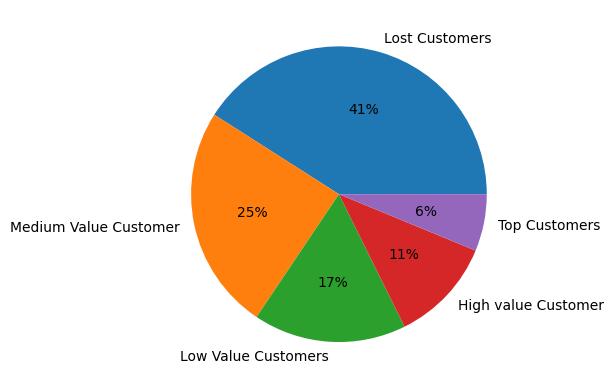

In [111]:
plt.pie(rfm.Customer_segment.value_counts(), labels=rfm.Customer_segment.value_counts().index, autopct='%.0f%%')
plt.show()

In [144]:
merge.head()
rfm.columns = rfm.columns.str.lower()
merge2 = rfm.merge(merge, on = 'lylty_card_nbr', how = 'left')
merge2 = merge2.drop(['recency','frequency','monetary','r_rank_norm','f_rank_norm','m_rank_norm','txn_id'], axis = 1)

In [158]:
merge2.head()

,lylty_card_nbr,rfm_score,customer_segment,store_nbr,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,avg_sales,date
0,1000,1.24,Lost Customers,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,3.0,2018-10-17
1,1003,1.51,Lost Customers,1,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget,3.0,2019-03-08
2,1004,1.26,Lost Customers,1,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream,1.9,2018-11-02
3,1011,1.34,Lost Customers,1,1,Smiths Crinkle Cut Chips Barbecue 170g,1,2.9,OLDER SINGLES/COUPLES,Mainstream,2.9,2018-12-19
4,1013,1.50,Lost Customers,1,93,Doritos Corn Chip Southern Chicken 150g,1,3.9,RETIREES,Budget,3.9,2019-03-04


In [197]:
segments = merge2.groupby(['customer_segment','premium_customer'], as_index = False)['avg_sales'].count()
segments.columns = ['customer_segment','premium','count']
segments

,customer_segment,premium,count
0,High value Customer,Budget,6370
1,High value Customer,Mainstream,6711
2,High value Customer,Premium,4582
3,Lost Customers,Budget,6530
4,Lost Customers,Mainstream,8003
5,Lost Customers,Premium,5039
6,Low Value Customers,Budget,3654
7,Low Value Customers,Mainstream,4311
8,Low Value Customers,Premium,2864
9,Medium Value Customer,Budget,8848


<AxesSubplot: xlabel='premium', ylabel='count'>

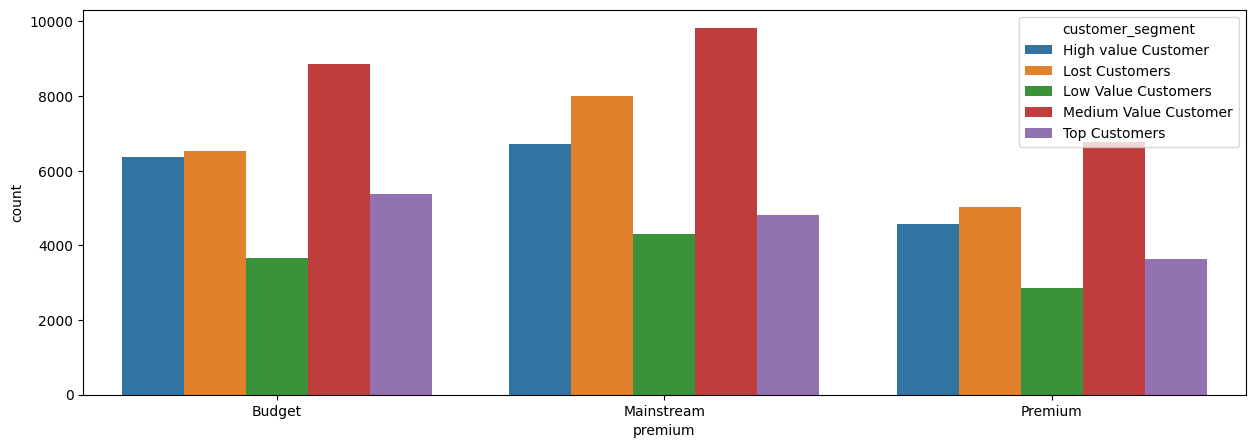

In [198]:
plt.figure(figsize=(15,5))
sns.barplot(data = segments, x = 'premium', y='count', hue = 'customer_segment')


merge.to_csv('merged_datasets_cleaned.csv')
new_trans.to_csv('transaction_data_cleaned.csv')
custdata.to_csv('customer_data_cleaned.csv')